# CAMB non-linear matter power spectrum exploration (_Halofit_-$\nu$)

In [8]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import camb
from camb import model, initialpower

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

WantCls = 1
WantTransfer = 0
WantScalars = 1
WantTensors = 0
WantVectors = 0
DoLensing = 1
want_zstar = 0
want_zdrag = 0
PK_WantTransfer = 0
NonLinear = 0
Want_CMB = 1
max_l = 2500
max_l_tensor = 600
max_eta_k = 5000.0
max_eta_k_tensor = 1200.0
omegab = 0.0450000017881
omegac = 0.254999995232
omegav = 0.699999988079
omegan = 0.0
H0 = 65.0
TCMB = 2.7255
YHe = 0.239999994636
num_nu_massless = 3.046
num_nu_massive = 0
nu_mass_eigenstates = 0
share_delta_neff = 0
nu_mass_degeneracies = [0.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_fractions = [0.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_numbers = [0, 0, 0, 0, 0]
scalar_initial_condition = 1
OutputNormalization = 1
AccuratePolarization = 1
AccurateBB = 0
AccurateReionization = 0
MassiveNuMethod = 3
InitPower:
  tensor_parameterization = 1
  nn = 1
  an = [1.0, 1.0, 1.0, 1.0, 1.0]
  n_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  n_runrun = [0.0, 0.0, 0.0, 0.0, 0.0]
  ant = [0.0, 0.0, 0.0, 0.0, 0.0]
  nt_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  rat = [1.0, 1.0, 1.0, 1.0, 1.0]
  k_0_

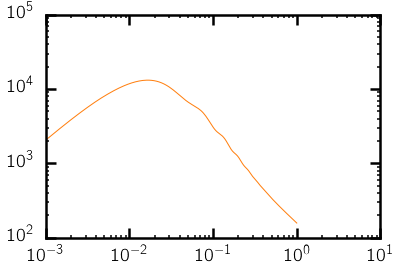

In [11]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
print pars
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.set_dark_energy() #re-set defaults
pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.53], kmax=2.0)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

prettyplot()
pretty_colors = prettycolors()
plt.loglog(kh_nonlin, pk_nonlin[0,:], color=pretty_colors[3])


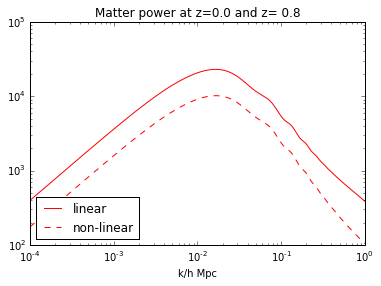

In [5]:

for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));